In [74]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [76]:
# Creating a dataframe for iris dataset
df = pd.read_csv('Datasets/Iris.csv')
df.dropna(inplace = True)

X = df.drop('Species',axis = 1)
Y = df['Species']

# Normalising the features
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)
X = pd.DataFrame(X_normalised,columns = X.columns)

# Splitting the dataset
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 120
Testing set size: 30


In [79]:
# Implementing K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

# Getting the score
score = accuracy_score(Y_test,Y_pred)
print(f'Accuracy Score : {score}')

# Getting the confusion matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)
print(f'Confusion Matrix : \n{conf_matrix}')

Accuracy Score : 1.0
Confusion Matrix : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


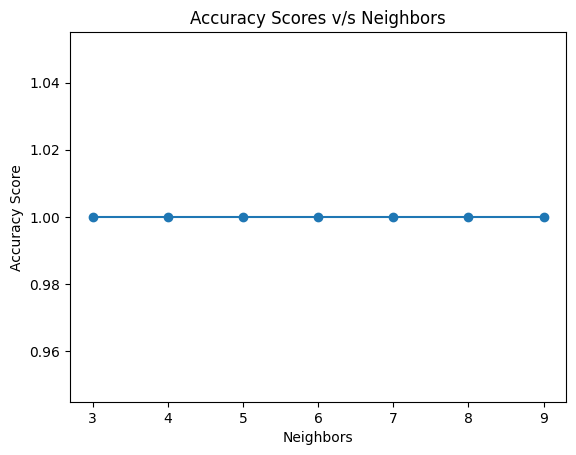

In [78]:
# Accuracy Scores v/s Neighbors graph
x_k = []
y_scores = []
for k in range(3,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    y_scores.append(accuracy_score(Y_test, Y_pred)) 
    x_k.append(k)

plt.plot(x_k,y_scores, marker='o')
plt.title('Accuracy Scores v/s Neighbors')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy Score')
plt.show()